# Regression Analysis

Let's compare EURO STOXX 50 to VSTOXX

EURO STOXX 50:
Historical daily closing values of the EURO STOXX 50 index, composed of European
blue-chip stocks

VSTOXX:
Historical daily closing data for the VSTOXX volatility index, calculated on the
basis of *volatilities implied* by options on the EURO STOXX 50 index

In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib as plt

### Fetching eurostoxx 50 data

In [6]:
import shutil
import urllib.request

es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'

raw_es_filename = 'data/raw_es50.txt'
with urllib.request.urlopen(es_url) as response:
    with open(raw_es_filename,'wb') as file:
        shutil.copyfileobj(response, file)

### Fetching vstoxx 50 data

In [7]:
vs_url = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt'

raw_vs_filename = 'data/raw_vs50.txt'

with urllib.request.urlopen(vs_url) as response:
    with open(raw_vs_filename,'wb') as file:
        shutil.copyfileobj(response, file)

## Data cleaning is necessary

- useless blanks
- couple of additional header lines to remove

In [4]:
lines = open(raw_es_filename, 'r').readlines()
lines[:6]

['Price Indices - EURO Currency\n',
 'Date    ;Blue-Chip;Blue-Chip;Broad    ; Broad   ;Ex UK    ;Ex Euro Zone;Blue-Chip; Broad\n',
 '        ;  Europe ;Euro-Zone;Europe   ;Euro-Zone;         ;            ; Nordic  ; Nordic\n',
 '        ;  SX5P   ;  SX5E   ;SXXP     ;SXXE     ; SXXF    ;    SXXA    ;    DK5F ; DKXF\n',
 '31.12.1986;775.00 ;  900.82 ;   82.76 ;   98.58 ;   98.06 ;   69.06 ;  645.26  ;  65.56\n',
 '01.01.1987;775.00 ;  900.82 ;   82.76 ;   98.58 ;   98.06 ;   69.06 ;  645.26  ;  65.56\n']

- From 27/12/2001 onwards, semicolon at the end of line to remove as well

In [5]:
for line in lines[3883:3890]:
    print(line[41:])

 300.97;   317.10;   267.23;  5268.36 ;  363.19

 306.60;   322.55;   272.18;  5360.52 ;  370.94

 306.77;   322.69;   272.95;  5360.52 ;  370.94

 312.43;   327.57;   277.68;  5479.59;   378.69;

 314.52;   329.94;   278.87;  5585.35;   386.99;

 311.43;   326.77;   272.38;  5522.25;   380.09;

 317.54;   332.62;   277.08;  5722.57;   396.12;



In [6]:
lines = [line.replace(' ', '') for line in lines]
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

We are going to generate a new text file:
- delete unneeded header lines
- write an appropriate header line
- add a helper column to remove the trailing semicolons

In [7]:
es_filename = 'data/res50.txt'
with open(es_filename,'w') as file:
    # writes the corrected third line of the original file
    # as first line of new file
    file.writelines('date' + lines[3][:-1] + ';DEL' + lines[3][-1])
    # writes the remaining lines of the original file
    file.writelines(lines[4:])

In [8]:
import pprint

with open(es_filename,'r') as file:
    pprint.pprint(file.readlines()[:5])

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']


In [9]:
es = pd.read_csv(es_filename, index_col=0, parse_dates=True, sep=';', dayfirst=True)
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2016-09-28,2847.0,2991.0,343.0,324.0,408.0,350.0,9072.0,581.0,NaN
2016-09-29,2849.0,2992.0,343.0,324.0,408.0,351.0,9112.0,583.0,NaN
2016-09-30,2843.0,3002.0,343.0,325.0,408.0,350.0,9116.0,583.0,NaN
2016-10-03,2845.0,2998.0,343.0,325.0,408.0,351.0,9131.0,584.0,NaN
2016-10-04,2871.0,3030.0,346.0,328.0,411.0,354.0,9212.0,589.0,NaN


The helper column has fulfilled its purpose and can now be deleted:

In [10]:
del es['DEL']
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
SX5P    7673 non-null float64
SX5E    7673 non-null float64
SXXP    7673 non-null float64
SXXE    7673 non-null float64
SXXF    7673 non-null float64
SXXA    7673 non-null float64
DK5F    7673 non-null float64
DKXF    7673 non-null float64
dtypes: float64(8)
memory usage: 539.5 KB


Equipped with the knowledge about the structure of the EURO STOXX 50 data set, we
can also use the advanced capabilities of the read_csv function to make the import
more compact and efficient:

In [8]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF',
'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col=0, parse_dates=True,
                 sep=';', dayfirst=True, header=None,
                 skiprows=4, names=cols)
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26
2016-10-03,2845.43,2998.50,343.23,325.08,408.44,350.92,9131.24,584.32
2016-10-04,2871.06,3029.50,346.10,327.73,411.41,353.92,9212.05,588.71


Fortunately, the VSTOXX data set is already in a form such that it can be imported a bit
more easily into a DataFrame object:

In [9]:
vs = pd.read_csv('data/raw_vs50.txt', index_col=0, header=2,
parse_dates=True, sep=',', dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


In [14]:
vs.head()

,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8
Date,,,,,,,,,
1999-01-04,18.2033,21.2458,17.5555,31.2179,33.3124,33.7327,33.2232,31.8535,23.8209
1999-01-05,29.6912,36.6400,28.4274,32.6922,33.7326,33.1724,32.8457,32.2904,25.0532
1999-01-06,25.1670,25.4107,25.1351,32.2186,32.6459,31.9673,32.9260,33.2871,26.0107
1999-01-07,32.5205,35.4410,32.2004,36.1265,34.5150,33.1095,33.2843,33.7269,26.2205
1999-01-08,33.2296,35.8846,33.0020,36.0813,36.3964,33.4658,33.4837,33.9227,26.3672


In [15]:
vs.tail()

,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8
Date,,,,,,,,,
2016-02-08,33.3917,34.7251,33.2189,31.8308,31.4783,30.6941,30.3705,29.8478,29.2559
2016-02-09,33.9664,35.7884,33.7800,32.6220,32.2459,31.5572,31.1659,30.5339,29.9000
2016-02-10,33.4528,34.6020,33.3637,32.1438,32.0018,31.2099,30.9937,30.8174,30.2533
2016-02-11,38.3051,41.2095,38.1347,35.8676,35.1073,33.7847,33.4126,32.2234,31.2124
2016-02-12,35.6846,35.3849,35.6965,34.1404,33.8645,32.9590,32.8208,32.3189,31.8194


help(pd.read_csv)

To implement the regression analysis, we only need one column from each data set:
- SX5E from Eurostoxx 50
- V2TX from Vstoxx

Since VSTOXX data is only available
from the beginning of January 1999, we only take data from that date on:

In [10]:
import datetime

start_date = datetime.datetime(1999, 1, 1)
end_date = datetime.datetime(2016, 2, 12)
filtered_es = pd.DataFrame({'EUROSTOXX' : es['SX5E'][(es.index > start_date) & (es.index < end_date)]})
filtered_vs = pd.DataFrame({'VSTOXX' : vs['V2TX'][(vs.index > start_date) & (vs.index < end_date)]})

We therefore generate a new DataFrame object within which we combine the two columns
of interest, namely those for the major indexes. 

In [11]:
help(pd.DataFrame().join)

Help on method join in module pandas.core.frame:

join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False) method of pandas.core.frame.DataFrame instance
    Join columns with other DataFrame either on index or on a key
    column. Efficiently Join multiple DataFrame objects by index at once by
    passing a list.
    
    Parameters
    ----------
    other : DataFrame, Series with name field set, or list of DataFrame
        Index should be similar to one of the columns in this one. If a
        Series is passed, its name attribute must be set, and that will be
        used as the column name in the resulting joined DataFrame
    on : column name, tuple/list of column names, or array-like
        Column(s) in the caller to join on the index in other,
        otherwise joins index-on-index. If multiples
        columns given, the passed DataFrame must have a MultiIndex. Can
        pass an array as the join key if not already contained in the
        calling DataFrame. Lik

In [12]:
data = filtered_es.join(filtered_vs)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4386 entries, 1999-01-04 to 2016-02-11
Data columns (total 2 columns):
EUROSTOXX    4386 non-null float64
VSTOXX       4355 non-null float64
dtypes: float64(2)
memory usage: 262.8 KB


31 vstoxx values are missing

In [13]:
missing_indices = data[data.isnull().any(axis=1)].index.values
data[data.isnull().any(axis=1)]

,EUROSTOXX,VSTOXX
1999-05-13,3693.62,NaN
1999-12-24,4781.16,NaN
2001-12-24,3696.98,NaN
2003-05-01,2324.23,NaN
2003-12-24,2725.07,NaN
2003-12-31,2760.66,NaN
2004-12-24,2951.16,NaN
2004-12-31,2951.01,NaN
2006-05-01,3839.90,NaN
2007-05-01,4392.41,NaN


In [14]:
type(missing_indices)

numpy.ndarray

In [15]:
data = data.fillna(method='ffill')

Let's check the vstoxx is updated at 31st Dec of 2015

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4386 entries, 1999-01-04 to 2016-02-11
Data columns (total 2 columns):
EUROSTOXX    4386 non-null float64
VSTOXX       4386 non-null float64
dtypes: float64(2)
memory usage: 262.8 KB


In [17]:
data[(data.index > datetime.datetime(2015,12,28)) & (data.index < datetime.datetime(2016,1,5))]

,EUROSTOXX,VSTOXX
2015-12-29,3314.28,21.6067
2015-12-30,3287.98,22.1745
2015-12-31,3267.52,22.1745
2016-01-04,3164.76,26.9980


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B024FAE630>,
      dtype=object)

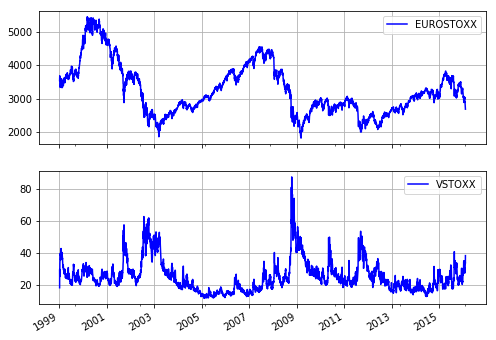

In [18]:
%matplotlib inline

data.plot(subplots=True, grid=True, style='b', figsize=(8, 6))

It is more appropriate to work on log returns

In [19]:
rets = np.log(data / data.shift(1))

In [20]:
rets.head()

,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B02645ACC0>,
      dtype=object)

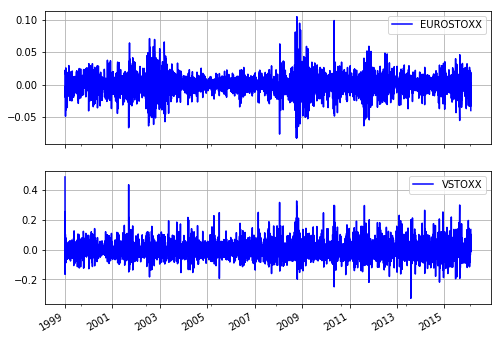

In [21]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6))

In [22]:
import statsmodels.api as sm

X = rets.EUROSTOXX
Y = rets.VSTOXX
X = sm.add_constant(X)
model = sm.OLS(Y, X, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 VSTOXX   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     5208.
Date:                Sun, 30 Sep 2018   Prob (F-statistic):               0.00
Time:                        09:14:41   Log-Likelihood:                 7964.0
No. Observations:                4385   AIC:                        -1.592e+04
Df Residuals:                    4383   BIC:                        -1.591e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.147e-05      0.001     -0.019      0.985      -0.001       0.001
EUROSTOXX     -2.8463      0.039    -72.164      0.000      -2.924      -2.769
==============================================================================
Omnibus:                     1315.684   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24606.871
Skew:                           0.951   Prob(JB):                         0.00
Kurtosis:                      14.448   Cond. No.                         66.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.736878
VSTOXX,-0.736878,1.000000


Obviously, there is indeed a highly negative correlation. We can access the results as follows:

In [28]:
results.params

-1.1469282088236458e-05

Text(0,0.5,'VSTOXX returns')

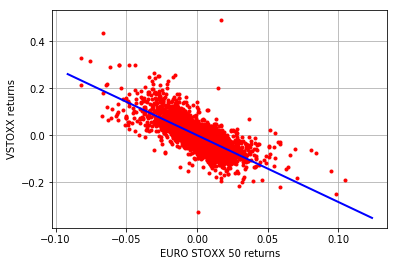

In [34]:
import matplotlib.pyplot as plt

plt.plot(rets.EUROSTOXX, rets.VSTOXX, 'r.')
ax = plt.axis() # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, results.params[0] + results.params[1] * x, 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')